# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [1]:

! git clone https://github.com/ds4e/get_data
%run ./get_data/get_data.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors

Cloning into 'get_data'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 109 (delta 37), reused 30 (delta 30), pack-reused 63 (from 1)
Receiving objects: 100% (109/109), 657.47 KiB | 16.44 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Download complete
Extracting data files...
Data extracted


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [2]:
# Q1.1
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
airbnb['Price'].unique() #reviewing values
airbnb['Price'].nunique()


airbnb['Price'] = airbnb['Price'].str.replace(',','') # removing commas from Price (ex. 1,234 -> 1234)
airbnb['Price'] = airbnb['Price'].astype(float) # casting price to type float

airbnb["Price"].isna().sum()


np.int64(0)

In [6]:
# Q1.2
police = pd.read_csv('data/mn_police_use_of_force.csv')
police['subject_injury'].isna().mean()

police["subject_injury"] = police["subject_injury"].fillna("Missing")
pd.crosstab(police["subject_injury"], police["force_type"])

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


The proportion of missing values is 0.76. It seems that more serious types of force like Police K9 Bite are better documented than more common, mild types of force like Bodily Force.

In [9]:
# Q1.3
metabric = pd.read_csv('data/metabric.csv')
metabric['Overall Survival Status'].unique()
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].map({'0:LIVING':1, '1:DECEASED':0})

metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0


In [13]:
# Q1.4
print("Number of missing vals: ", airbnb["Review Scores Rating"].isna().sum())
median_score = airbnb["Review Scores Rating"].median()

airbnb["Review Scores Rating with Imputed"] = (
    airbnb["Review Scores Rating"].fillna(median_score)
)
print("Number of missing vals: ", airbnb["Review Scores Rating with Imputed"].isna().sum())


Number of missing vals:  8323
Number of missing vals:  0


Imputing the median score for missing values can lead to bias that masks the true quality differneces in airbnbs. Additionally, it artificially reduces the natural variance in the data.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [17]:
# Q2.1
sharks = pd.read_excel("data/GSAF5.xls") # using read_excel
sharks.shape

(7074, 23)

In [19]:
# Q2.2
sharks = sharks.dropna(axis=1, how='all')

Q2.3

Each data point represents a single documented shark-attack incident, including details such as date, location, victim information, and outcome.

In [24]:
# Q2.4
sharks["Year"] = pd.to_numeric(sharks["Year"], errors="coerce")
sharks['Year'].describe()

,Year
count,7072.000000
mean,1936.004242
std,270.672015
min,0.000000
25%,1948.000000
50%,1987.000000
75%,2010.000000
max,2026.000000


<Axes: >

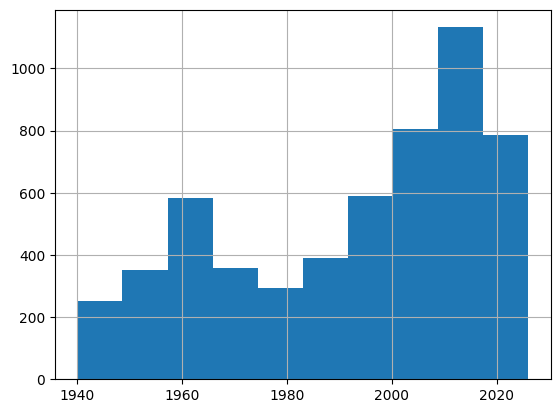

In [25]:
sharks_1940 = sharks[sharks['Year'] >= 1940]
sharks_1940['Year'].hist()

Based on the data, it seems that shark attacks have increased in prevalency over time.

<Axes: >

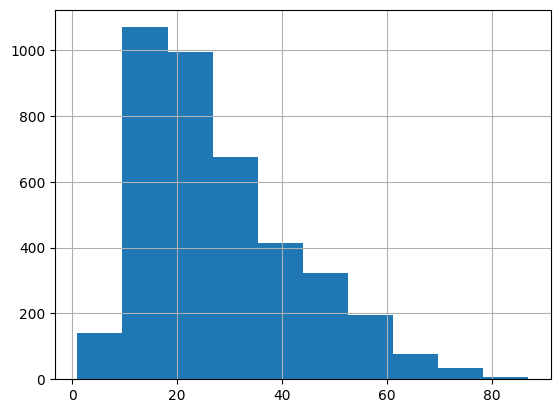

In [27]:
# Q2.5
sharks["Age"] = pd.to_numeric(sharks["Age"], errors="coerce")
sharks["Age"].hist()

In [30]:
# Q2.6
sharks['Type'].unique()
sharks['Type'] = sharks['Type'].replace({
    'Questionable': 'Unknown',
    'unprovoked': 'Unprovoked',
    ' Provoked': 'Provoked',
    'Watercraft': 'Provoked',
    'Boat': 'Provoked',
    'Sea Disaster': 'Unprovoked',
    '?': 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Invalid': 'Unknown',
    'Under investigation': 'Unknown',
    np.nan: 'Unknown'
})
proportion = (sharks['Type'] == 'Unprovoked').mean()

print("The proportion of attacks that are unprovoked is: ", proportion)
sharks['Type'].unique()

The proportion of attacks that are unprovoked is:  0.7729714447271699


array(['Unprovoked', 'Provoked', 'Unknown'], dtype=object)

In [36]:
# Q2.7
sharks['Fatal Y/N'].unique()
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].replace({
    'y': 'Y',
    'Y x 2': 'Y',

    'n': 'N',
    'N ': 'N',
    ' N': 'N',
    'Nq': 'N',

    'F': 'UNKNOWN',
    'M': 'UNKNOWN',
    2017: 'UNKNOWN',
    '2017': 'UNKNOWN',
    np.nan: 'UNKNOWN'
})
sharks['Fatal Y/N'].unique()


array(['Y', 'N', 'UNKNOWN'], dtype=object)

In [37]:
# Q2.8
pd.crosstab(sharks['Type'], sharks['Fatal Y/N'])

Fatal Y/N,N,UNKNOWN,Y
Type,,,
Provoked,953,21,32
Unknown,43,537,20
Unprovoked,3947,83,1438


Based on the data, it seems that a shark attack is more likely to be fatal when the attack is unprovoked. This is surprising, as one might expect provoked encounters to be more dangerous, but unprovoked attacks may catch victims more vulnerable or unprepared.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about data tidying, a generalizable standard to easily manipulate, visualize, and analyze data.

2. By establishing a standardized approach to data tidying, the time required for cleaning and restructuring data is reduced.

3. The first setnence suggests that tidy datasets have a predictable format, but messy data incurs unique problems that require unique solutions. The second sentence means that despite being able to determine the meaning of a given row in data, depending on the context we may interpret the data differently.

4. Wickman defines values asd individual data points, variables as as all values that measure the same attribute, and observations as all values measured on the same unit across attributes.

5. Tidy Data is defined as abiding by three rules: each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

6. The five most common problems with messy datasets are:

* Columns headers are values, not variable names
* Multiple variables are stored in one column
* Variables are stored in both rows and columns
* Multiple types of observational units are stored in the same table
* A single observational unit is stored in multiple tables

  Table 4 is messy because income groups are displayed as multiple columns of the table rather than as a single variable, which violates tidy data principles.

7. Table 11 lacks descriptive column names, contains many missing values, and has far more columns than rows, making it difficult to interpret. Table 12 is easier to read and more concise. Although Table 12 is in molten format and includes missing values in one column, it is still cleaner than Table 11 because its structure is more intuitive and easier to understand.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [43]:
# Q4.1
gifts = pd.read_csv('data/ForeignGifts_edu.csv')
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


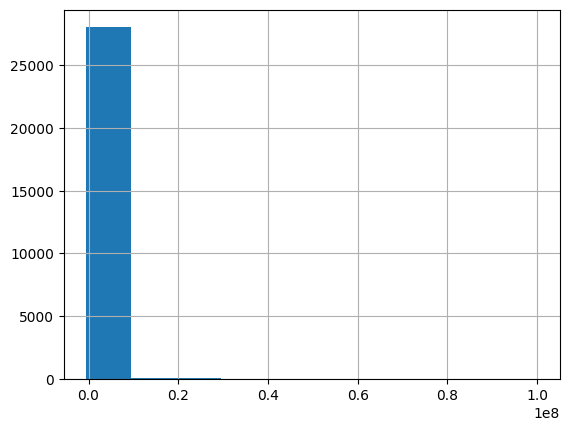

In [45]:
# Q4.2
gifts['Foreign Gift Amount'].hist()
gifts['Foreign Gift Amount'].describe()

The distribution is unimodal and heavily right skewed.

In [46]:
# Q4.3
gifts['Gift Type'].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [54]:
# Q4.4
gifts.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)

,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [53]:
gifts.groupby('Country of Giftor')["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [61]:
# Q4.5
gifts_amount_per_insitution = gifts.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False)
gifts_amount_per_insitution.head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

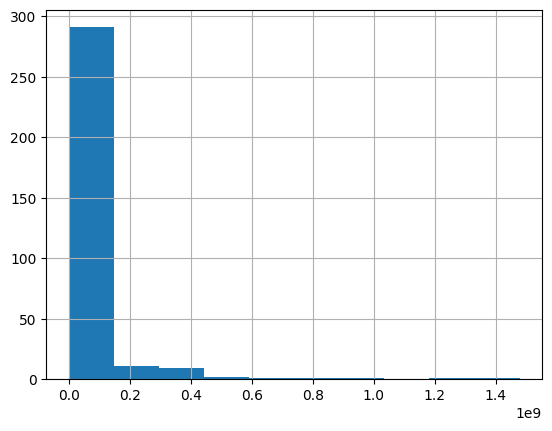

In [62]:
gifts_amount_per_insitution.hist()

In [63]:
# Q4.6
gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [66]:
# Q5.1
college = pd.read_csv('data/college_completion.csv')
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [67]:
# Q5.2
college.shape

(3798, 63)

There are 3798 observations and 63 variables.

In [69]:
# Q5.3
pd.crosstab(college["control"], college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public schools tend to be 2-year institutions and private schools end to be 4-year institutions.

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


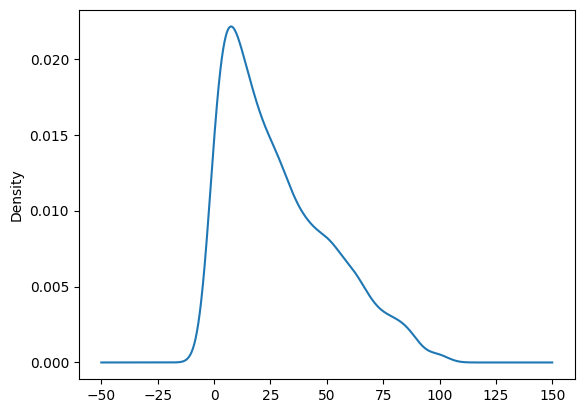

In [72]:
# Q5.4
college['grad_100_value'].plot(kind='kde')
college['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


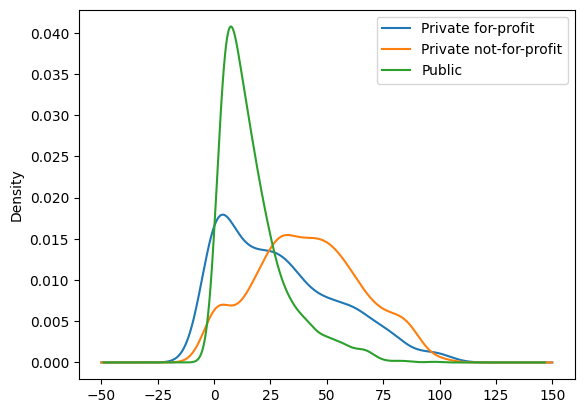

In [74]:
college.groupby("control")["grad_100_value"].plot(kind="kde", legend=True)
college.groupby("control")["grad_100_value"].describe()

Private not-for-profit institutions seem to have the most favorable graduation rates.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

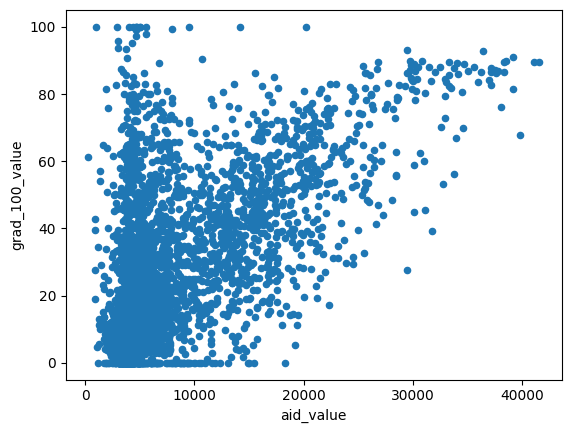

In [77]:
# Q5.5
college.plot.scatter(x="aid_value", y="grad_100_value",)


In [79]:
cov = college["grad_100_value"].cov(college["aid_value"])
corr = college["grad_100_value"].corr(college["aid_value"])
print("The covariance and correlation between aid_value and grad_100_value are respectively: {}, {}".format(cov,corr))

The covariance and correlation between aid_value and grad_100_value are respectively: 88610.48316902434, 0.5758792845936073


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

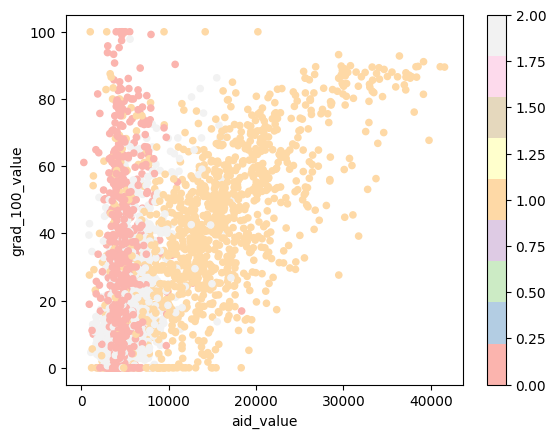

In [87]:
college.plot.scatter(x="aid_value", y="grad_100_value",c=college["control"].astype("category").cat.codes,colormap="Pastel1")


It appears that aid positively correlates with graduation rate for private not-for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

## 1.
\begin{aligned}
m(a + bX)
&= \frac{1}{N} \sum_{i=1}^N (a + b x_i) \\
&= \frac{1}{N} \left( \sum_{i=1}^N a + b \sum_{i=1}^N x_i \right) \\
&= a + b \left( \frac{1}{N} \sum_{i=1}^N x_i \right) \\
&= a + b\,m(X)
\end{aligned}

## 2.
\begin{aligned}
\operatorname{cov}(X,X)
&= \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(X)) \\
&= \frac{1}{N} \sum_{i=1}^N (x_i - m(X))^2 \\
&= s^2
\end{aligned}

## 3.
From earlier:
\begin{aligned}
m(a + bY) = a + b\,m(Y)
\end{aligned}

Then:
\begin{aligned}
\operatorname{cov}(X, a + bY)
&= \frac{1}{N} \sum_{i=1}^N (x_i - m(X))\left[(a + b y_i) - (a + b m(Y))\right] \\
&= \frac{1}{N} \sum_{i=1}^N (x_i - m(X))\, b (y_i - m(Y)) \\
&= b\,\operatorname{cov}(X,Y)
\end{aligned}

## 4.
\begin{aligned}
\operatorname{cov}(a + bX, a + bY)
&= \frac{1}{N} \sum_{i=1}^N \left[b(x_i - m(X))\right]\left[b(y_i - m(Y))\right] \\
&= b^2 \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y)) \\
&= b^2\,\operatorname{cov}(X,Y)
\end{aligned}

## 5.
Because \( a + bX \) is a monotone increasing transformation when \( b > 0 \), order is preserved. So:

\begin{aligned}
\operatorname{med}(a + bX) = a + b\,\operatorname{med}(X)
\end{aligned}

For the interquartile range:

\begin{aligned}
\operatorname{IQR}(a + bX)
&= (a + bQ_3) - (a + bQ_1) \\
&= b(Q_3 - Q_1) \\
&= b\,\operatorname{IQR}(X)
\end{aligned}

## 6.
Let  X = \{1, 4\} .

**Squaring:**

\begin{aligned}
m(X) = (1+4)/2 = 2.5
\\ (m(X))^2 = 6.25
\\ m(X^2) = (1^2+4^2)/2 = 8.5
\\m(X^2) \neq (m(X))^2
\end{aligned}

**Square root:**

\begin{aligned}
m(\sqrt{X}) = \frac{1 + 2}{2} = 1.5
\\ \sqrt{m(X)} = \sqrt{2.5} \approx 1.58
\\ m(\sqrt{X}) \neq \sqrt{m(X)}
\end{aligned}

These examples show that the results above depend on the linearity of the transformation \( Y = a + bX \). Nonlinear transformations such as \( $X^2 $\) or \( $\sqrt{X} $\) do not behave similarly.


**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [90]:
# Q7.1
ames = pd.read_csv('data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


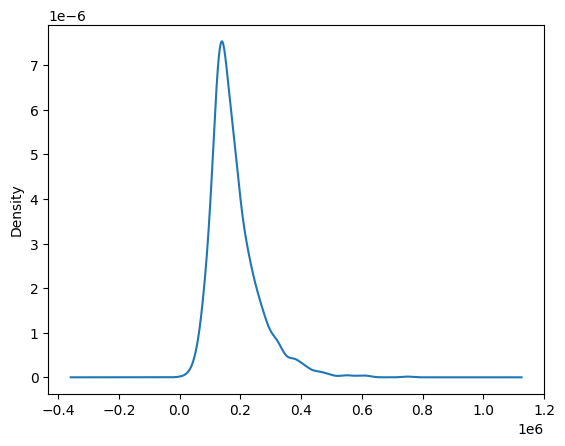

In [91]:
# 7.2
ames['price'].plot(kind='kde')
ames['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


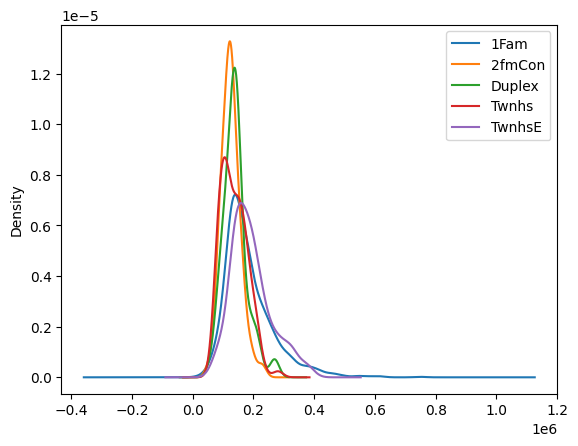

In [92]:
ames.groupby('Bldg.Type')['price'].plot(kind='kde', legend=True)
ames.groupby('Bldg.Type')['price'].describe()

On average, TwnhsE is the most expensive building type and 1Fam has the highest variance in transaction price.

<Axes: xlabel='price', ylabel='Proportion'>

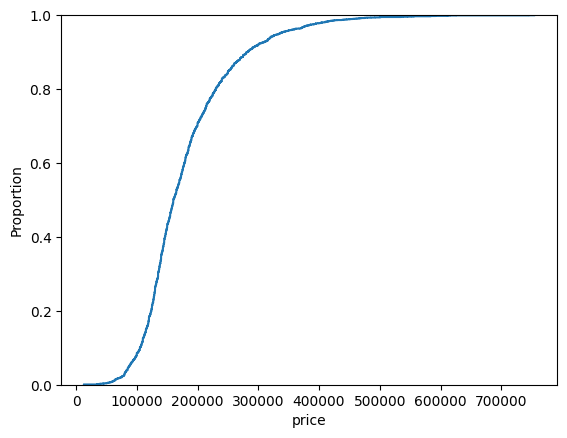

In [93]:
# Q7.3
sns.ecdfplot(data=ames, x="price")


In [94]:
ames["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])


,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


<Axes: xlabel='price'>

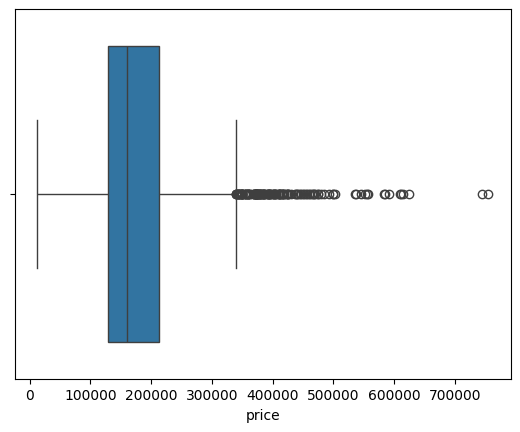

In [95]:
# Q7.4
sns.boxplot(x=ames["price"])


In [ ]:
Yes, there are a lot of outliers.


<Axes: xlabel='Bldg.Type', ylabel='price'>

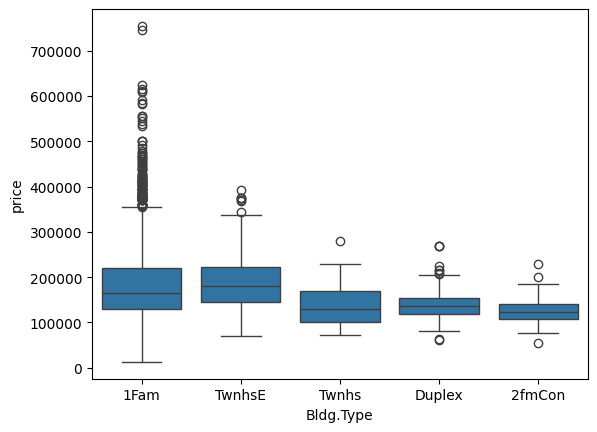

In [96]:
sns.boxplot(data=ames, x="Bldg.Type", y="price")

One thing I notices is that buildings of type 1Fam have a lot of outliers. Buildings of Twnhs have the least amount of outliers.

In [97]:
# Q7.5
q1 = ames["price"].quantile(0.25)
q3 = ames["price"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

ames["price_outlier"] = ((ames["price"] < lower_bound) | (ames["price"] > upper_bound)).astype(int)

ames["price_outlier"].value_counts()

,count
price_outlier,
0,2793
1,137


,price_winsor
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


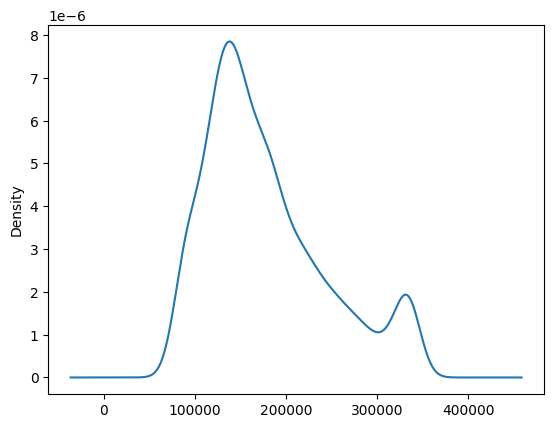

In [98]:
# Q7.6
lower = ames["price"].quantile(0.05)
upper = ames["price"].quantile(0.95)

ames["price_winsor"] = ames["price"].clip(lower, upper)
ames['price_winsor'].plot(kind='kde')

ames['price_winsor'].describe()

By capping outliers, winsorizing reduces variance and standard deviation, smooths the KDE tail, and may slightly change the mean.